<a href="https://colab.research.google.com/github/Tejatrix/Tejatrix/blob/main/BinaryClassification_Deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras

import sklearn
from sklearn.model_selection import train_test_split

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
tf.random.set_seed(32)


In [8]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
all_ds = pd.read_excel('/content/drive/MyDrive/heart_failure_clinical_records_dataset.xlsx')

In [7]:
 all_ds

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [10]:
all_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# **Cleaning Data**

In [11]:
# Checking for Null values 
all_ds.isnull().sum(1)

0      0
1      0
2      0
3      0
4      0
      ..
294    0
295    0
296    0
297    0
298    0
Length: 299, dtype: int64

In [12]:
# No null values. Hence we don't have to replace any rows.

In [13]:
# "time" signifies only the order in which entries are made. Hence we are dropping the column.
all_ds = all_ds.drop('time', axis=1)

# **Rearranging Data for better performence**

In [14]:
data = all_ds.sample(frac=1)
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
281,70.0,0,582,0,40,0,51000.00,2.7,136,1,1,0
167,59.0,0,66,1,20,0,70000.00,2.4,134,1,0,1
39,60.0,0,235,1,38,0,329000.00,3.0,142,0,0,1
47,60.0,0,582,1,38,1,451000.00,0.6,138,1,1,1
199,60.0,0,1211,1,35,0,263358.03,1.8,113,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
154,65.0,1,335,0,35,1,235000.00,0.8,136,0,0,0
137,68.0,1,646,0,25,0,305000.00,2.1,130,1,0,0
231,70.0,0,93,0,35,0,185000.00,1.1,134,1,1,0
25,80.0,0,148,1,38,0,149000.00,1.9,144,1,1,1


In [15]:
#Dividing data into training data and temperory test data.
train_data,temp_test_data = train_test_split(data,test_size = 0.4)

In [16]:
print( train_data.shape)
print ( temp_test_data.shape)

(179, 12)
(120, 12)


In [17]:
#Dividing the temperory test data to testing and validation data
test_data,valid_data = train_test_split(temp_test_data,test_size = 0.5)

In [18]:
print( train_data.shape)
print ( test_data.shape)
print( valid_data.shape)

(179, 12)
(60, 12)
(60, 12)


# **EDA**

In [19]:
# Pairwise plot to find any anomolies.
train_stats = train_data.describe()
train_stats.pop('DEATH_EVENT')

count    179.000000
mean       0.312849
std        0.464954
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: DEATH_EVENT, dtype: float64

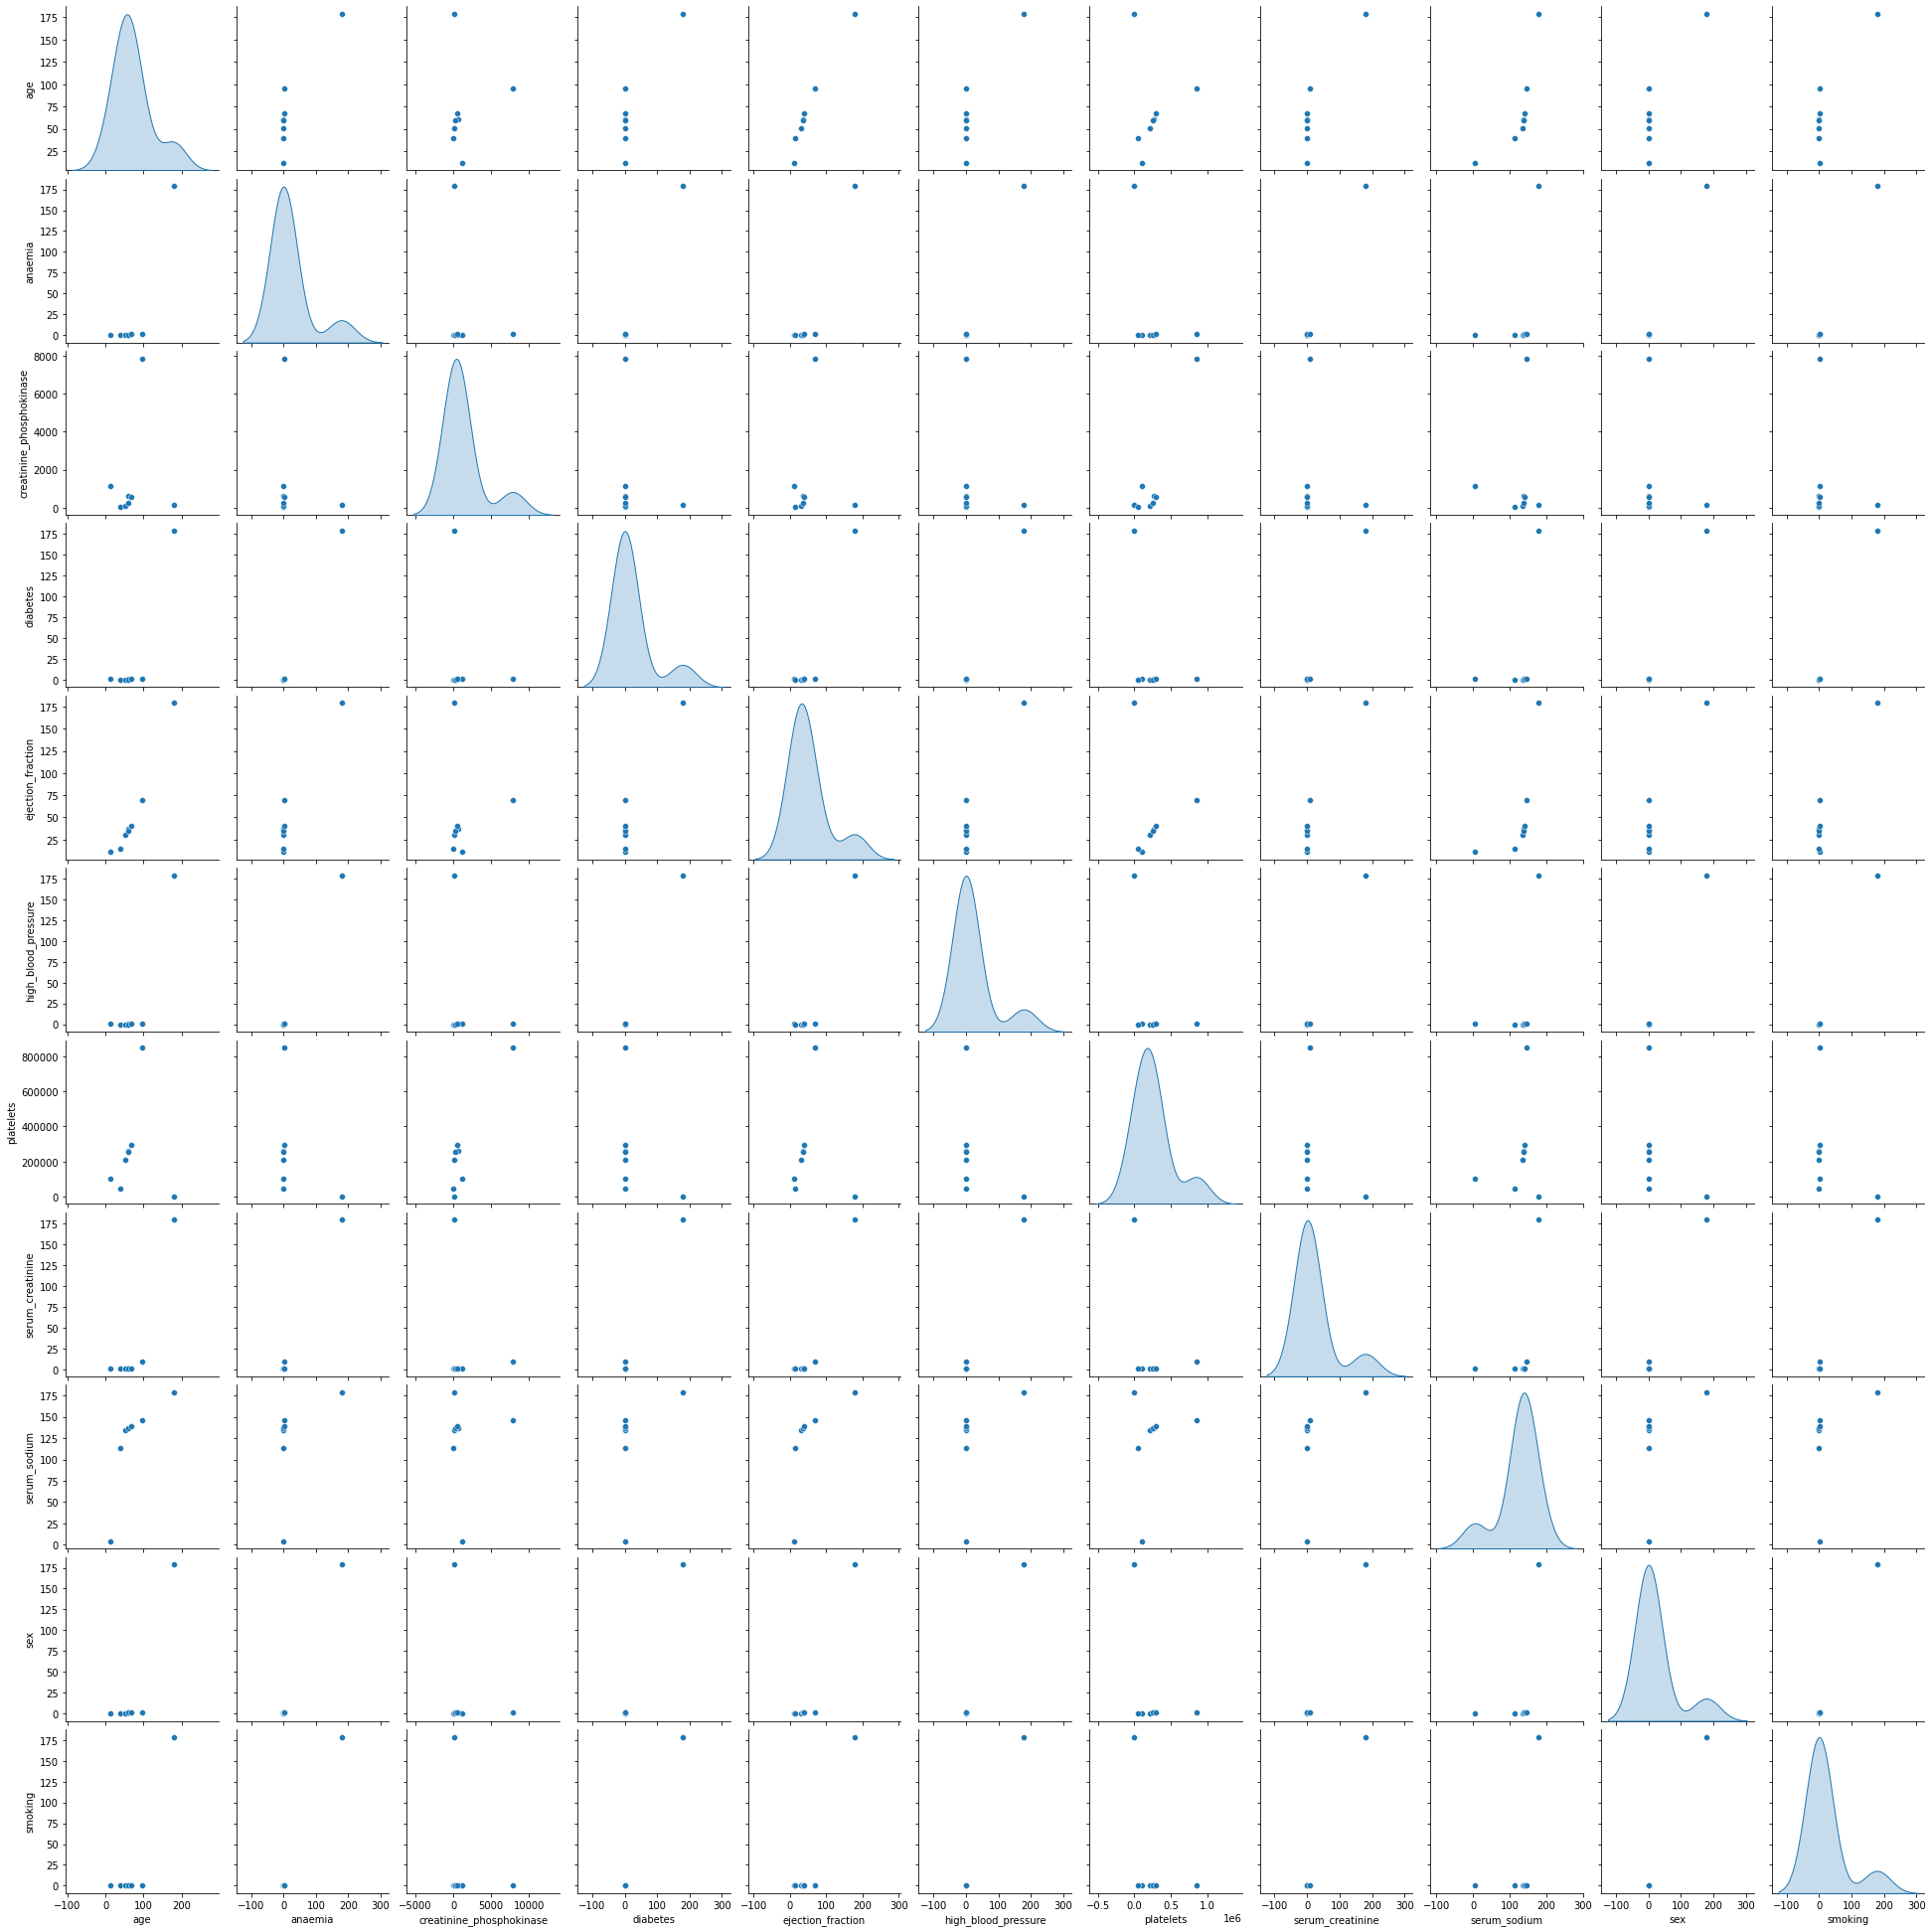

In [20]:
sns.pairplot(train_stats[train_stats.columns], diag_kind = "kde")

In [21]:
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
age,179.0,60.668531,11.829653,40.0,51.0,60.0,67.5,95.0
anaemia,179.0,0.418994,0.494778,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,179.0,632.709497,1135.165268,23.0,112.5,250.0,582.0,7861.0
diabetes,179.0,0.435754,0.497246,0.0,0.0,0.0,1.0,1.0
ejection_fraction,179.0,36.972067,11.035403,15.0,30.0,35.0,40.0,70.0
high_blood_pressure,179.0,0.318436,0.467176,0.0,0.0,0.0,1.0,1.0
platelets,179.0,260199.600447,103773.664972,47000.0,208000.0,253000.0,294500.0,850000.0
serum_creatinine,179.0,1.411508,1.019396,0.6,1.0,1.1,1.4,9.0
serum_sodium,179.0,136.726257,4.306767,113.0,135.0,137.0,139.0,146.0
sex,179.0,0.670391,0.471390,0.0,0.0,1.0,1.0,1.0


In [22]:
# Removing the target vaiables and saving in different dataframes.
train_labels = train_data.pop('DEATH_EVENT')
test_labels = test_data.pop('DEATH_EVENT')
valid_labels = valid_data.pop('DEATH_EVENT')

# **Normalising the data**

In [23]:
def norm(x) : 
  return (x-train_stats['mean'])/(train_stats['std'])

In [24]:
normed_train_data = norm(train_data)
normed_test_data = norm(test_data)
normed_valid_data = norm(valid_data)

In [25]:
normed_train_data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
146,-0.732780,-0.846832,-0.441090,-0.876335,-0.631791,-0.681618,-0.406650,-0.697970,-0.168632,0.699228,1.336726
268,-1.324513,-0.846832,-0.044671,1.134741,0.093149,-0.681618,0.402804,-0.501776,0.760139,-1.422159,-0.743917
35,0.704287,-0.846832,-0.044671,1.134741,-0.178704,-0.681618,-0.310287,2.048753,-0.633017,0.699228,-0.743917
51,-0.648246,1.174274,-0.477208,-0.876335,-1.537965,1.458902,1.520621,-0.011289,0.527947,-1.422159,-0.743917
56,0.788820,1.174274,-0.491302,-0.876335,-0.178704,-0.681618,-0.358469,1.263975,0.295754,0.699228,1.336726
77,-1.578113,-0.846832,-0.467517,1.134741,0.274384,-0.681618,-0.223560,-0.207484,0.760139,0.699228,-0.743917
224,-0.225580,-0.846832,-0.044671,1.134741,-1.084878,-0.681618,2.349347,-0.403678,0.295754,0.699228,-0.743917
193,1.042420,1.174274,-0.353878,1.134741,-0.631791,-0.681618,-0.965559,-0.227103,1.224525,0.699228,1.336726
293,0.197087,1.174274,-0.466636,1.134741,-0.178704,-0.681618,-0.782468,-0.501776,-0.168632,0.699228,1.336726
215,1.042420,-0.846832,-0.044671,-0.876335,-0.178704,1.458902,-0.551196,-0.109387,-0.633017,0.699228,-0.743917


In [26]:
normed_train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,179.0,9.675687e-17,1.0,-1.747180,-0.817313,-0.056513,0.577487,2.902153
anaemia,179.0,-1.860709e-17,1.0,-0.846832,-0.846832,-0.846832,1.174274,1.174274
creatinine_phosphokinase,179.0,6.202363e-18,1.0,-0.537111,-0.458268,-0.337140,-0.044671,6.367611
diabetes,179.0,-8.311167e-17,1.0,-0.876335,-0.876335,-0.876335,1.134741,1.134741
ejection_fraction,179.0,2.580183e-16,1.0,-1.991053,-0.631791,-0.178704,0.274384,2.992907
high_blood_pressure,179.0,6.450458e-17,1.0,-0.681618,-0.681618,-0.681618,1.458902,1.458902
platelets,179.0,-6.524886e-16,1.0,-2.054467,-0.503014,-0.069378,0.330531,5.683527
serum_creatinine,179.0,-2.208041e-16,1.0,-0.796068,-0.403678,-0.305581,-0.011289,7.444103
serum_sodium,179.0,-2.276267e-15,1.0,-5.509065,-0.400824,0.063561,0.527947,2.153296
sex,179.0,1.141235e-16,1.0,-1.422159,-1.422159,0.699228,0.699228,0.699228


# ***Building the Neural Network***

In [27]:
# We declare a function for modelling.
def build_model_3hidden_layers():
  # Keras model object, container that contains all the layers.
  model = Sequential()
  # Input layer with 32 Neurons.
  model.add(Dense(32, input_shape = (normed_train_data.shape[1],)))


  model.add(Dense(32,Activation('relu')))

  model.add(Dense(64,Activation('relu')))

  model.add(Dense(64,Activation('relu')))

  model.add(Dense(128,Activation('relu')))

  model.add(Dense(1))

  learning_rate = 0.001
  optimizer = optimizers.SGD(learning_rate)
  model.compile( loss = tf.keras.losses.BinaryCrossentropy( from_logits= True ) ,
              optimizer = optimizer ,
              metrics=['accuracy'])

#softmax

  return model
  return model

model2 = build_model_3hidden_layers()
print('Summary of the model : ')
model2.summary()




Summary of the model : 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 16,161
Trainable params: 16,161
Non-trainable params: 0
____________________________

# **Training the data**

In [28]:
def build_model_2hidden_layers() :
  
  model = Sequential()

  #Input layer
  model.add(Dense(32, input_shape = (normed_train_data.shape[1],)))
  model.add(Dense(128,Activation('relu')))

  model.add(Dense(1))

  learning_rate = 0.0001
  optimizer = optimizers.SGD(learning_rate)
  model.compile( loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer=optimizer, metrics=['accuracy'])

  return model



model=build_model_2hidden_layers()
print('Summary of the model : ')
model.summary()



Summary of the model : 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                384       
_________________________________________________________________
dense_7 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [29]:
EPOCHS = 256
batch_size = 16

history = model.fit(
    normed_train_data,
    train_labels,
    batch_size = batch_size,
    epochs = EPOCHS,
    verbose = 1,
    shuffle = True,
    steps_per_epoch = int(normed_train_data.shape[0]/batch_size),
    validation_data = (normed_valid_data, valid_labels)

)

Epoch 1/256
11/11 [==============================] - 3s 24ms/step - loss: 0.7514 - accuracy: 0.5909 - val_loss: 0.7432 - val_accuracy: 0.6500
Epoch 2/256
11/11 [==============================] - 0s 5ms/step - loss: 0.7480 - accuracy: 0.5828 - val_loss: 0.7428 - val_accuracy: 0.6333
Epoch 3/256
11/11 [==============================] - 0s 6ms/step - loss: 0.7444 - accuracy: 0.6012 - val_loss: 0.7423 - val_accuracy: 0.6500
Epoch 4/256
11/11 [==============================] - 0s 6ms/step - loss: 0.7601 - accuracy: 0.6319 - val_loss: 0.7417 - val_accuracy: 0.6500
Epoch 5/256
11/11 [==============================] - 0s 5ms/step - loss: 0.7542 - accuracy: 0.5215 - val_loss: 0.7415 - val_accuracy: 0.6500
Epoch 6/256
11/11 [==============================] - 0s 6ms/step - loss: 0.7342 - accuracy: 0.6074 - val_loss: 0.7410 - val_accuracy: 0.6500
Epoch 7/256
11/11 [==============================] - 0s 5ms/step - loss: 0.7396 - accuracy: 0.5828 - val_loss: 0.7406 - val_accuracy: 0.6500
Epoch 8/256


In [30]:
print('Summary of results of each Epoch : ')
hist = pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail()

Summary of results of each Epoch : 


,loss,accuracy,val_loss,val_accuracy,epoch
251,0.672127,0.674847,0.668143,0.716667,251
252,0.665908,0.687500,0.667929,0.716667,252
253,0.674870,0.674847,0.667728,0.716667,253
254,0.664252,0.730061,0.667438,0.716667,254
255,0.686901,0.625767,0.667289,0.716667,255


# **Loss/Accuracy Plots :**

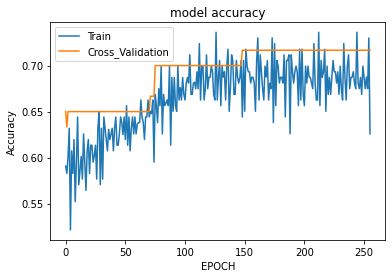

In [31]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('EPOCH')
plt.legend(['Train','Cross_Validation'], loc = 'upper left')
plt.show()

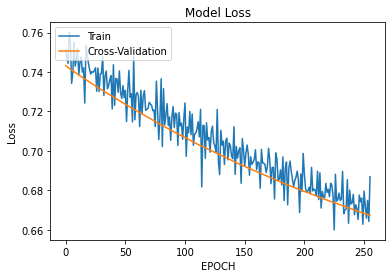

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('EPOCH')
plt.legend(['Train','Cross-Validation'], loc='upper left')
plt.show()

In [33]:
# Loss functions are dropping, which indicates that the model may perform better if we increase epochs.


In [34]:
print('Train Split : ')
loss, accuracy = model.evaluate(normed_train_data, train_labels, verbose = 1)

print('Accuracy :  {:5.2f}'.format(accuracy))

Train Split : 
6/6 [==============================] - 0s 3ms/step - loss: 0.6702 - accuracy: 0.6872
Accuracy :   0.69


In [35]:
print('Evaluation Split : ')
loss, accuracy = model.evaluate(normed_valid_data, valid_labels, verbose = 2)

print('Accuracy :  {:5.2f}'.format(accuracy))

Evaluation Split : 
2/2 - 0s - loss: 0.6673 - accuracy: 0.7167
Accuracy :   0.72


In [36]:
print('Test Split : ')
loss, accuracy = model.evaluate(normed_test_data, test_labels, verbose = 2)

print('Accuracy :  {:5.2f}'.format(accuracy))

Test Split : 
2/2 - 0s - loss: 0.6968 - accuracy: 0.6333
Accuracy :   0.63


# **Confusion Matrix**

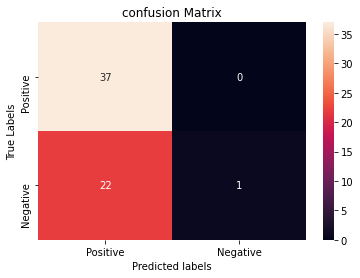

In [37]:
from sklearn.metrics import confusion_matrix

ax=plt.subplot()
predict_results = model.predict(normed_test_data)

predict_results = (predict_results > 0.5)  #thershold for binary classification.

cm = confusion_matrix(test_labels, predict_results)

sns.heatmap(cm, annot=True, ax=ax) #annot is for annotating results.

ax.set_xlabel('Predicted labels'); ax.set_ylabel('True Labels');
ax.set_title('confusion Matrix');
ax.xaxis.set_ticklabels(['Positive','Negative']);ax.yaxis.set_ticklabels(['Positive','Negative']);